Существует множество фреймворков для конструирования нейронных сетей на Python. 

Один из самых широкоиспользуемых — [PyTorch](https://pytorch.org/).

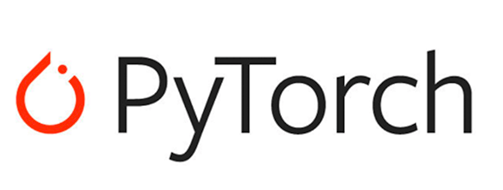

In [ ]:
import torch

In [ ]:
torch.__version__

'1.13.1+cu116'

### Создание тензора по параметрам

Основной объект фреймворка PyTorch — тензор. Он представляет собой многомерную матрицу, содержащую элементы одного типа данных.

Для инициализации тензора случайными числами из нормального распределения используется метод `tensor.randn`. В скобках мы передаем размер тензора (`.shape`). Количество передаваемых чисел отвечает за размерность тензора (`.dim()`). Из значений размера тензора можно вычислить количество элементов в нем (`.numel()`).

In [ ]:
t34 = torch.randn(3, 4)
print(t34)
print(f'Размер = {t34.shape}')
print(f'Размерность = {t34.dim()}')
print(f'Количество элементов = {t34.numel()}')

tensor([[ 1.5699, -0.4603,  0.3133, -1.2177],
        [ 0.1737,  1.6017, -0.4095, -0.2711],
        [ 0.1665,  0.8601,  1.3872, -0.8974]])
Размер = torch.Size([3, 4])
Размерность = 2
Количество элементов = 12


Мы привыкли к матрицам как к табличкам, у которых размерность 2: строки и столбцы. Чаще у нас будут бо́льшие размерности. Например, размерность 3: в списке первого уровня 2 элемента, в каждом из списков второго уровня по 3 строчки, в списках третьего уровня по 4 элемента.  

In [ ]:
t234 = torch.randn(2, 3, 4)
print(t234)
print(f'Размер = {t234.shape}')
print(f'Размерность = {t234.dim()}')
print(f'Количество элементов = {t234.numel()}')

tensor([[[ 0.0060,  0.9236, -0.0298,  1.5700],
         [ 0.4458,  1.0736,  0.2883,  0.6758],
         [ 0.0810,  0.0549,  0.7467, -0.2515]],

        [[-0.9212, -0.4860,  0.0892,  0.4577],
         [-0.1563, -0.3000,  0.8330, -0.2714],
         [-0.3074, -0.0040,  0.6315,  0.3527]]])
Размер = torch.Size([2, 3, 4])
Размерность = 3
Количество элементов = 24


В случае с нейросетями первая размерность отвечает за количество батчей, вторая — за количество объектов в батче, третья — за количество признаков у каждого объекта.

📌 Что такое батч? Сколько будет батчей, объектов в батче и признаков у объекта в примере выше?

Можно создать тензор с исходным содержимым: из нулей (`torch.zeros`), из единиц (`torch.ones`), с единицами на главной диагонали (`torch.eye`). 

In [ ]:
torch.zeros(3, 2, 4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones(2, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [ ]:
torch.eye(5, 5)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

Метод `torch.trill` создает треугольную матрицу, у которой все элементы выше главной диагонали равны нулю. Это может быть полезно для создания масок — специальных тензоров, которые можно накладывать на тензор с данными (поэлементтное умножение). На месте 1 стоит важная информация, которую нужно оставить, на месте 0 — которую нужно стереть. 

In [ ]:
torch.tril(torch.ones(2, 3, 3))

tensor([[[1., 0., 0.],
         [1., 1., 0.],
         [1., 1., 1.]],

        [[1., 0., 0.],
         [1., 1., 0.],
         [1., 1., 1.]]])

### Создание тензора из numpy матрицы 

Мы поговорили о том, как создать тензор с заранее неизвестным содержимым, как инициализировать его случайными числами, нулями или единицами.

В ситуации, когда мы знаем требуемое содержимое тензора, можно инициализировать его из данных через numpy массив. Для этого может быть несколько способов.

In [ ]:
import numpy as np

In [ ]:
data = np.array([1, 2, 3])

Есть 3 способа преобразования numpy массива в тензор.

In [ ]:
Tensor = torch.Tensor(data)
print(f'Tensor = {Tensor}')
tensor = torch.tensor(data)
print(f'tensor = {tensor}')
as_tensor = torch.as_tensor(data)
print(f'as_tensor = {as_tensor}')

Tensor = tensor([1., 2., 3.])
tensor = tensor([1, 2, 3])
as_tensor = tensor([1, 2, 3])


Первый способ автоматически привел данные к типу float. Остальные 2 способа на первый взгляд ведут себя одинаково: преобразовали numpy массив, сохранив исходный тип данных.

Посмотрим на разницу в хранении данных.

Заменим каждый из элементов исходного numpy массива на 0.

In [ ]:
data[0] = 0
data[1] = 0
data[2] = 0
print(f'data = {data}')

data = [0 0 0]


📌 Что стало с тензорами, которые были созданы из numpy массива?

In [ ]:
# Место для вашего кода
print(f'Tensor = {Tensor}')
print(f'tensor = {tensor}')
print(f'as_tensor = {as_tensor}')

Tensor = tensor([1., 2., 3.])
tensor = tensor([1, 2, 3])
as_tensor = tensor([0, 0, 0])


Можно создать тензор не из всего numpy массива, а только из его части.

In [ ]:
a = np.array([[1,2,3],
              [4,5,6]])
print(a)

[[1 2 3]
 [4 5 6]]


📌 Создайте тензор размерности 1 из чисел первого столбца матрицы с помощью метода `as_tensor`.

In [ ]:
# Место для вашего кода
b = torch.as_tensor(a[:, 0])
print(b)

tensor([1, 4])


📌 Замените числа в первом столбце матрицы на 0. Изменится ли тензор?

In [ ]:
# Место для вашего кода
a[:, 0] = [0, 0]
print(a)
print(b)

[[0 2 3]
 [0 5 6]]
tensor([0, 0])


### Изменение размера тензора

In [ ]:
t = torch.tensor(np.array([[[1,2,3],
                            [4,5,6],
                            [7,8,9]],
                           [[1,2,3],
                            [4,5,6],
                            [7,8,9]]]))
print(f'Размер = {t.shape}')
print(f'Размерность = {t.dim()}')
print(f'Количество элементов = {t.numel()}')

Размер = torch.Size([2, 3, 3])
Размерность = 3
Количество элементов = 18


#### Методы reshape и flatten

Метод `.reshape()` преобразует размер и размерность тензора, не меняя данные. Берет на вход параметры, которые интерпретируются как размер выходного тензора.

In [ ]:
t.reshape(2,9)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9]])

Произведение размерностей должно равняться числу элементов исходного тензора. Иначе мы получим ошибку.

In [ ]:
t.reshape(2,8)

RuntimeError: ignored

📌 Как можно преобразовать размер тензора, сохранив размерность 3?

In [ ]:
# Место для вашего кода
t.reshape(3, 1, 6)

tensor([[[1, 2, 3, 4, 5, 6]],

        [[7, 8, 9, 1, 2, 3]],

        [[4, 5, 6, 7, 8, 9]]])

В случае большого количества элементов в тензоре сложно вычислить подходящие параметры метода `reshape`. Вместо одной из размерносткй мы можем указать значение -1, тогда он будет вычислен автоматически.

In [ ]:
t.reshape(6, -1)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
t.reshape(3, -1, 3)

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[7, 8, 9],
         [1, 2, 3]],

        [[4, 5, 6],
         [7, 8, 9]]])

Метод `.flatten()` преобразует тензор в вектор.

In [ ]:
t.shape

torch.Size([2, 3, 3])

In [ ]:
t.flatten(start_dim=1)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [ ]:
t.flatten()

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Методы squeeze и unsqueeze

Создадим из исходного тензора новый тензор, где последняя размерность 1. В полученном тензоре каждый элемент является списком длины 1.

In [ ]:
t1 = t.reshape(3, 6, 1)
print(t1)

tensor([[[1],
         [2],
         [3],
         [4],
         [5],
         [6]],

        [[7],
         [8],
         [9],
         [1],
         [2],
         [3]],

        [[4],
         [5],
         [6],
         [7],
         [8],
         [9]]])


Метод `.squeeze` убирает размерность, равную 1.

In [ ]:
t2 = t1.squeeze()
print(t2)
print(t2.shape)

tensor([[1, 2, 3, 4, 5, 6],
        [7, 8, 9, 1, 2, 3],
        [4, 5, 6, 7, 8, 9]])
torch.Size([3, 6])


Метод `.unsqueeze()` выполняет обратное действие: добавляет размерность, равную 1. При этом обязательно указывать, куда добавляется параметр.

In [ ]:
t3 = t1.unsqueeze(dim=0)
print(t3)
print(t3.shape)

tensor([[[[1],
          [2],
          [3],
          [4],
          [5],
          [6]],

         [[7],
          [8],
          [9],
          [1],
          [2],
          [3]],

         [[4],
          [5],
          [6],
          [7],
          [8],
          [9]]]])
torch.Size([1, 3, 6, 1])


📌 Примените метод `squeeze` к тензору `t3`, у которого несколько размерностей равно 1. Какой результат мы получим?


In [ ]:
# Место для вашего кода
print(t3.squeeze())
print(t3.squeeze().shape)

tensor([[1, 2, 3, 4, 5, 6],
        [7, 8, 9, 1, 2, 3],
        [4, 5, 6, 7, 8, 9]])
torch.Size([3, 6])


### Конкатенация тензоров

Конкатенация — объединение двух или более объектов с сохранением порядка следования элементов.

Самый простой пример — конкатенация строк. Можно задать порядок соединения.

In [ ]:
s1 = 'water'
s2 = 'melon'
s3 = s1 + s2
print(s3)
s4 = s2 + s1
print(s4)

watermelon
melonwater


#### Метод torch.cat

Пусть у нас есть тензор размерности 2 и тензор размерности 1.

In [ ]:
c = torch.tensor([
    [1,2],
    [1,2]])
c.shape

torch.Size([2, 2])

In [ ]:
d = torch.tensor([3,4])
d.shape

torch.Size([2])

Мы хотим добавить тензор `d` в качестве новой строки к тензору `c`. Для конкатенации тензоров используется метод `torch.cat()`.

In [ ]:
torch.cat((c,d))

RuntimeError: ignored

Можно конкатенировать только тензоры с одинаковым количеством размерностей. 

📌 Необходимо добавить нулевую размерность, равную 1, для тензора `d`.

In [ ]:
# Место для вашего кода
d12 = d.unsqueeze(dim=0)
print(d12)
print(d12.shape)
print(c.shape)

tensor([[3, 4]])
torch.Size([1, 2])
torch.Size([2, 2])


Попробуем снова осуществить конкатенацию. Укажем, что конкатенируем по размерности 0 (добавляем новую строку).

In [ ]:
torch.cat((c,d12), dim=0)

tensor([[1, 2],
        [1, 2],
        [3, 4]])

Мы также можем добавить тензор не только в качестве новой строки, но и в качестве нового столбца (по размерности 1). 

In [ ]:
torch.cat((c,d12), dim=1)

RuntimeError: ignored

При конкатенации все размерности, кроме той, по которой мы конкатенируем, должны совпадать. Поэтому предварительно нужно снова поменять размер тензора `d`.

📌 Запишите решение с помощью метода `unsqueeze`.

In [ ]:
# Место для вашего кода
d21 = d.unsqueeze(dim=1)
print(d21)
print(d21.shape)
print(c.shape)
torch.cat((c,d21), dim=1)

tensor([[3],
        [4]])
torch.Size([2, 1])
torch.Size([2, 2])


tensor([[1, 2, 3],
        [1, 2, 4]])

📌 Запишите решение с помощью метода `reshape`.

In [ ]:
# Место для вашего кода
d21 = d12.reshape(2,1)
print(d21)
print(d21.shape)
print(c.shape)
torch.cat((c,d21), dim=1)

tensor([[3],
        [4]])
torch.Size([2, 1])
torch.Size([2, 2])


tensor([[1, 2, 3],
        [1, 2, 4]])

#### Метод torch.stack

Пусть у нас есть три батча `a1`, `a2` и `a3`, в каждом из которых по три примера. Нам нужно объединить их в один тензор, сохраняя разбиение по батчам.

In [ ]:
a1 = torch.tensor([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])
a2 = torch.tensor([
    [2,2,2],
    [2,2,2],
    [2,2,2]
])
a3 = torch.tensor([
    [3,3,3],
    [3,3,3],
    [3,3,3]
])

📌 Почему результат применения метода `torch.cat` не подойдет?

In [ ]:
# Место для вашего кода
data1 = torch.cat((a1,a2,a3))
print(data1)
print(data1.shape)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]])
torch.Size([9, 3])


Для сохранения разбиения на батчи используется метод `torch.stack`.

In [ ]:
data2 = torch.stack((a1,a2,a3))
print(data2)
print(data2.shape)

tensor([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],

        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]]])
torch.Size([3, 3, 3])


### Поэлементные опрерации над тензорами

Поэлементные операции возможны только над тензорами одинакового размера. В них задействованы элементы с одинаковыми индексами.

In [ ]:
b1 = torch.tensor([[1,2],
                   [3,4]])
b2 = torch.tensor([[5,6],
                   [7,8]])

| операция | аналоги |
|:-:|:-:|
|`+`| `.add()` |
|`-`| `.sub()` |
|`*`| `.mul()` |
|`/`| `.div()` |

📌 Примените операции сложения, вычитания, деления и умножения к тензорам `b1` и `b2`.

In [ ]:
# Место для вашего кода
print(b1 + b2)
#print(b1.add(b2))
print(b1 - b2)
#print(b1.sub(b2))
print(b1 * b2)
#print(b1.mul(b2))
print(b1 / b2)
#print(b1.div(b2))

tensor([[ 6,  8],
        [10, 12]])
tensor([[-4, -4],
        [-4, -4]])
tensor([[ 5, 12],
        [21, 32]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])


📌 Возможны ли те же самые операции возможны не только для двух тензоров, но и для тензора и числа?

In [ ]:
# Место для вашего кода
print(b1 + 2)
#print(b1.add(2))
print(b1 - 2)
#print(b1.sub(2))
print(b1 * 2)
#print(b1.mul(2))
print(b1 / 2)
#print(b2.div(2))

tensor([[3, 4],
        [5, 6]])
tensor([[-1,  0],
        [ 1,  2]])
tensor([[2, 4],
        [6, 8]])
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


На самом деле, мы не применяем число к каждому элементу тензора, а неявно расширяем его до тензора нужного размера (broadcasting).

In [ ]:
np.broadcast_to(2, b1.shape)

array([[2, 2],
       [2, 2]])

In [ ]:
b1 + torch.tensor(np.broadcast_to(2, b1.shape))

tensor([[3, 4],
        [5, 6]])

Благодаря операции brpadcasting возможны поэлементные операции между тензорами, которые имеют разный размер.

In [ ]:
c1 = torch.tensor([[9,8],
                   [7,6]])
c2 = torch.tensor([5,4])
print(c1 + c2)

tensor([[14, 12],
        [12, 10]])


In [ ]:
np.broadcast_to(c2, c1.shape)

array([[5, 4],
       [5, 4]])

In [ ]:
c1 + torch.tensor(np.broadcast_to(c2, c1.shape))

tensor([[14, 12],
        [12, 10]])

### Операции сравнения

Операции сравнения также осуществляются поэлементно. Если размер тензоров не совпадает или сравниваются тензор и число, то тоже применяется операция broadcasting.

In [ ]:
f = torch.tensor([[4,-3,1],
                  [-7,0,-8],
                  [5,7,0]])

| операция | аналоги |
|:-:|:-:|
|`==`| `.eq()` |
|`>`| `.gt()` |
|`<`| `.lt()` |
|`>=`| `.ge()` |
|`<=`| `.le()` |

Равенство

In [ ]:
print(f.eq(0))
#print(f == 0)

tensor([[False, False, False],
        [False,  True, False],
        [False, False,  True]])


Строгие неравенства (**gt** — **g**reater **t**han, **lt** — **l**ess **t**han)

In [ ]:
print(f.gt(0)) 
#print(f > 0)
print(f.lt(0))
#print(f < 0)

tensor([[ True, False,  True],
        [False, False, False],
        [ True,  True, False]])
tensor([[False,  True, False],
        [ True, False,  True],
        [False, False, False]])


Нестрогие неравенства (**ge** — **g**reater than or **e**qual to, **le** — **l**ess than or **e**qual to)

In [ ]:
print(f.ge(0))
#print(f >= 0)
print(f.le(0))
#print(f <= 0)

tensor([[ True, False,  True],
        [False,  True, False],
        [ True,  True,  True]])
tensor([[False,  True, False],
        [ True,  True,  True],
        [False, False,  True]])


### Операции, уменьшающие количество элементов

In [ ]:
g = torch.tensor([[0,1,0,3],
                  [2,0,2,0],
                  [0,3,0,1]], dtype=torch.float32)

Метод `.sum()` — сумма всех элементов тензора.

In [ ]:
g.sum()

tensor(12.)

Метод `.prod()` — произведение всех элементов тензора.

In [ ]:
g.prod()

tensor(0.)

Метод `.mean()` — среднее значение для всех элементов тензора.

In [ ]:
g.mean()

tensor(1.)

Метод `.std()` — стандартное отклонение для всех элементов тензора.

In [ ]:
g.std()

tensor(1.2060)

Эти же операции можно применять не ко всем элементам тензора, а только к одной размерности.

In [ ]:
g.shape

torch.Size([3, 4])

Сумма по столбцам. `dim=0`, "убираем" нулевую ось, на выходе 4 элемента:

In [ ]:
g.sum(dim=0)

tensor([2., 4., 2., 4.])

Сумма по строкам. `dim=1`, "убираем" первую ось, на выходе 3 элемента:

In [ ]:
g.sum(dim=1)

tensor([4., 4., 4.])

### Max/Argmax

In [ ]:
h = torch.tensor([[1,0,0,2],
                  [0,7,3,0],
                  [4,0,0,5]], dtype=torch.float32)

Метод `.max()` отдает самое большое значение среди всех элементов тензора.

In [ ]:
h.max()

tensor(7.)

Метод `.argmax()` отдает позицию самого большого значения, если тензор "развернуть" в виде вектора.

In [ ]:
h.argmax()

tensor(5)

In [ ]:
h.flatten()

tensor([1., 0., 0., 2., 0., 7., 3., 0., 4., 0., 0., 5.])

При заданной размерности возвращается два элемента: значения и индексы.

Самое большое значение по столбцам. `dim=0`, получаем индексы самых больших элементов по нулевой размерности, на выходе 4 элемента:

In [ ]:
h.max(dim=0)

torch.return_types.max(
values=tensor([4., 7., 3., 5.]),
indices=tensor([2, 1, 1, 2]))

In [ ]:
h.argmax(dim=0)

tensor([2, 1, 1, 2])

Самое большое значение по строкам. `dim=1`, получаем индексы самых больших элементов по первой размерности, на выходе 3 элемента:

In [ ]:
h.max(dim=1)

torch.return_types.max(
values=tensor([2., 7., 5.]),
indices=tensor([3, 1, 3]))

In [ ]:
h.argmax(dim=1)

tensor([3, 1, 3])

При интерпретации выходных значений нейросети нас интересуют не сами значения, а их позиция, которая интерпретируется как номер класса.

### Вычисление градиентов

Большинство методов, которые мы рассмотрели, в том или ином виде присутствуют и в numpy массивах.

Особенность torch тензоров состоит в том, что они позволяют работать с градиентами.

Сложная функция – функция от функции. Если $z$ – функция от $y$, т.е. $z(y)$, а $y$ – функция от $x$, т.е. $y(x)$, то функция $f(x) = z(y(x))$ называется сложной функцией от $x$.

Нейронная сеть — цепочка функций, линейных и нелинейных, которые вместе образуют сложную функцию. После того как мы определили, какая функция от какой зависит, какой слой идет за каким, она может быть представлена как граф вычислений. 

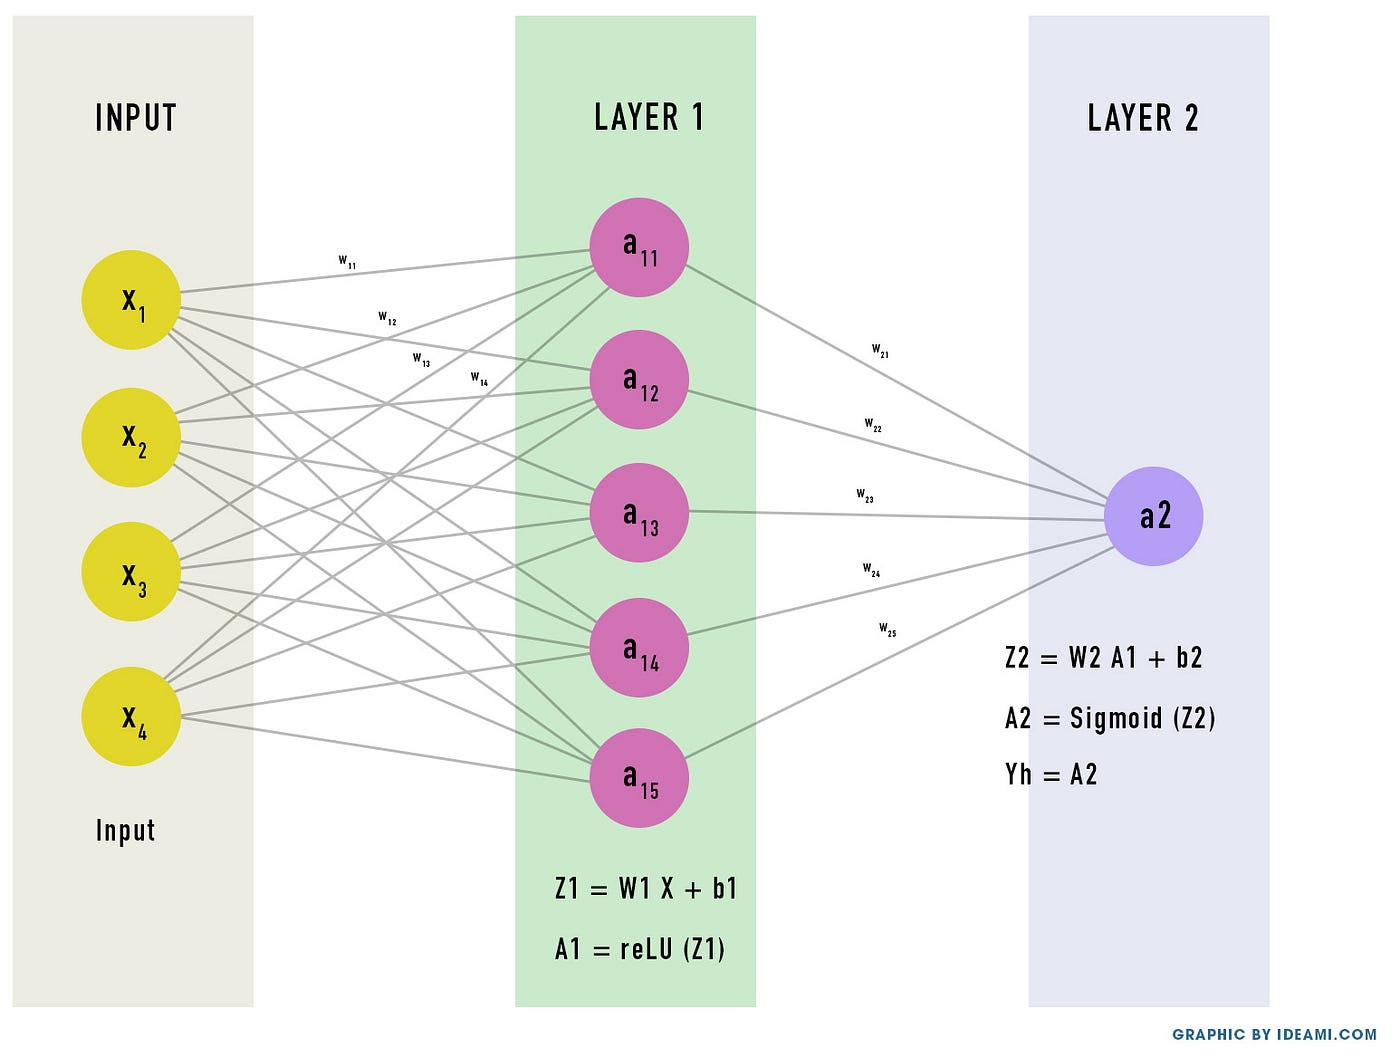

Pytorch умеет сам считать градиенты по графу вычислений. Для простоты мы вначале рассмотрим пример, где будем оперировать не матрицами и векторами, а просто числами, чтобы понять, что происходит с градиентом.

Например, функцию $f = wx + b$ можно представить следующим графом. 

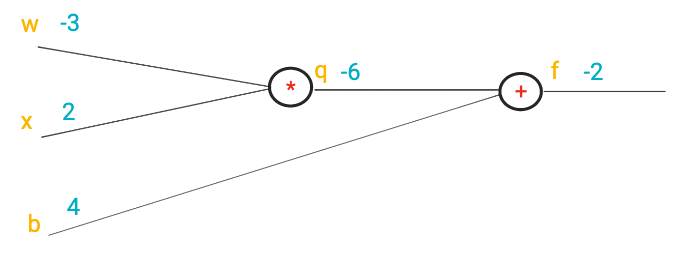

Мы пропустили по графу вычислений конкретные числа и получили результат, вычислили значение функции.

Изменение весов $w$ и $b$ осуществляется с помощью метода обратного распространения ошибки. Для того чтобы обновлять веса при обучении, нужно вычислить значение частных производных $\large\frac{\partial f}{\partial w}$ и  $\large\frac{\partial f}{\partial b}$ при конкретных значениях переменных.

Таблица производных:

$c'=0, c=const$

$(x^n)'=nx^{n-1}$

Рассмотрим функцию $f=wx+b$. Найдем градиент функции для переменных $w$ и $b$.
$$\frac{\partial f}{\partial b} = 1$$
Для вычисление $\large\frac{\partial f}{\partial w}$ может быть использовано цепное правило дифференцирования сложной функции.

Можем представить $f$ как сложную функцию. Если $q = w \cdot x$ – функция от $w$, т.е. $q(w)$, а $f= q + b$ – функция от $q$, т.е. $f(q)$, то $f$ – сложная функция $f(q(w))$.

Тогда по цепному правилу:
$$\frac{\partial f}{\partial w} = \frac{\partial f}{\partial q} \cdot \frac{\partial q}{\partial w}$$
$$\frac{\partial f}{\partial q} = 1$$
$$\frac{\partial q}{\partial w} = x$$
$$\frac{\partial f}{\partial w} = 1\cdot x = x$$

То же самое можно посчитать в pytorch.

Создадим тензоры и определим функции. Параметр `requires_grad=True` означает, что для этих тензоров будет считаться градиент – для весов и сдвига. По умолчанию он принимает значение `False`, что используется в тензорах с данными.

In [ ]:
w = torch.tensor(-3., requires_grad=True)
x = torch.tensor(2.)
q = w * x
b = torch.tensor(4., requires_grad=True)
f = q + b

Запустим метод обратного распространения ошибки.

In [ ]:
f.backward()

In [ ]:
print('df/db =', b.grad)
print('df/dw =', w.grad)

df/db = tensor(1.)
df/dw = tensor(2.)


Подсчет градиентов позволяет оптимизировать параметры нейросети. Градиенты хранятся в поле `.grad` самих тензоров.

В нейросетях мы считаем градиенты не для чисел, а для матриц, следовательно, используем матричное умножение.

In [ ]:
w = torch.tensor([[-3., 0, 1], 
                  [0, -3, -1]] , requires_grad=True)
x = torch.tensor([[2.], 
                  [2.], 
                  [2.]])
q = w @ x
print(q)
b = torch.tensor([[4.], 
                  [4.]], requires_grad=True)
f = q + b
print(f)

tensor([[-4.],
        [-8.]], grad_fn=<MmBackward0>)
tensor([[ 0.],
        [-4.]], grad_fn=<AddBackward0>)


In [ ]:
f.backward()

RuntimeError: ignored

Сейчас выход функции потерь – вектор, а должен быть числом. Мы всегда считаем градиент после применения фукнции потерь.

Посчитаем сумму `.sum()`, чтобы получить число и применить метод `.backward()`.

In [ ]:
f.sum().backward()

In [ ]:
print('df/db =', b.grad)
print('df/dw =', w.grad)

df/db = tensor([[1.],
        [1.]])
df/dw = tensor([[2., 2., 2.],
        [2., 2., 2.]])


Тензоры также хранят информацию о том, с помощью какой функции они были сформированы.

In [ ]:
f.grad_fn # f = q + b

In [ ]:
q.grad_fn # q = w @ x

In [ ]:
x.grad_fn # нет функции